<span style="color:purple">

## ■ AI topic 중 "pose estimation" 관련 논문 scraping 및 최신 알고리즘 분석
    
</span>



- AI 는 최신 기술, 최신 연구 내용이 중요하고 계속 새로운 SOTA(state-of-the-art) 알고리즘이 나오고 있기 때문에 follow-up 해가며 update 해주는 것이 중요하다.
- 중복 연구를 피하면서 현재 연구에 도움이 되는 유의미한 논문을 찾아야 한다.

- 영어 논문이기 때문에 nltk 의 Penn Treebank Tagset 을 사용하여 POS Tagging 을 진행한다.


In [118]:
## 기본
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

## Text 데이터 처리
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')


## (1) 논문 검색
###  ■ 구글 검색창에서 'pose estimation paper'  입력

- 네이버나 다음보다 구글에 더 다양한 논문이 있다.

In [119]:
## 구글 검색을 위한 라이브러리
from urllib.parse import quote_plus
from selenium import webdriver

baseurl = 'https://www.google.com/search?q=' 

plusurl = input('무엇을 검색할까요? : ')
url = baseurl + quote_plus(plusurl) 

driver = webdriver.Chrome() 
driver.get(url) 

html = driver.page_source 
soup = BeautifulSoup(html)

r = soup.select('.yuRUbf') 

for i in r :
    print(i.select_one('.LC20lb.DKV0Md').text)
          
driver.close()

무엇을 검색할까요? : pose estimation paper
Pose Estimation | Papers With Code
3D Human Pose Estimation | Papers With Code
Monocular Human Pose Estimation: A Survey of Deep ...
Human Pose Estimation via Deep Neural Networks - Google ...
A 2019 guide to Human Pose Estimation with Deep Learning
A 2019 Guide to Human Pose Estimation | by Derrick Mwiti ...
wangzheallen/awesome-human-pose-estimation ... - GitHub
Human Pose Estimation Papers - Awesome Open Source
Through-Wall Human Pose Estimation Using Radio Signals
Deep Learning Based 2D Human Pose Estimation - IEEE Xplore


### ▶ 검색 데이터의 headline 을 추출한다.


In [120]:
print(titles)

['Pose Estimation | Papers With Code', '3D Human Pose Estimation | Papers With Code', 'Monocular Human Pose Estimation: A Survey of Deep ...', 'Human Pose Estimation via Deep Neural Networks - Google ...', 'A 2019 guide to Human Pose Estimation with Deep Learning', 'A 2019 Guide to Human Pose Estimation | by Derrick Mwiti ...', 'wangzheallen/awesome-human-pose-estimation ... - GitHub', 'Human Pose Estimation Papers - Awesome Open Source', 'Through-Wall Human Pose Estimation Using Radio Signals', 'Deep Learning Based 2D Human Pose Estimation - IEEE Xplore']


### ▶ 검색된 title의 크기를 확인한다.

In [121]:
print(len(titles))

10


### ▶ 검색된 title의 각각을 프린트 한다.

In [122]:
for title in titles :
    print(title)
    print()

Pose Estimation | Papers With Code

3D Human Pose Estimation | Papers With Code

Monocular Human Pose Estimation: A Survey of Deep ...

Human Pose Estimation via Deep Neural Networks - Google ...

A 2019 guide to Human Pose Estimation with Deep Learning

A 2019 Guide to Human Pose Estimation | by Derrick Mwiti ...

wangzheallen/awesome-human-pose-estimation ... - GitHub

Human Pose Estimation Papers - Awesome Open Source

Through-Wall Human Pose Estimation Using Radio Signals

Deep Learning Based 2D Human Pose Estimation - IEEE Xplore



## (2) 본격 스크래핑 단계 


### ▶ 첫 페이지부터 원하는 페이지 까지 논문 헤드라인을 스크래핑하는 함수 정의

In [123]:
# 해드라인 검색 및 추출 함수를 정의
# 검색 키워드 & 스타트 페이지 & 검색 마지막 페이지를 parameter(매개변수) 로 받음
# 파이썬은 매개변수가 여러개 인 경우 뒤의 매개 변수부터 디폴트값을 가질 수 있음 


title_list = []

def web_scraping(keyword, end, start = 0):    # 시작 페이지의 default 값은 0(즉, 첫 페이지 부터 시작) 
    while 1:

        if start > (end -1) * 10 :    # 스타트 페이지가 마지막 페이지보다 크면 while 문을 빠져 나감 
            break        
        
        url ='https://www.google.com/search?q={}&start={}'.format(keyword,start)

        driver = webdriver.Chrome()
        driver.get(url)                    # 해당 페이지를 가져옴

        html = driver.page_source
        soup = BeautifulSoup(html)
        r = soup.select('.yuRUbf')
         
        titles = [ i.select_one('.LC20lb.DKV0Md').text for i in r ]    # 헤드라인 기사를 가져옴 
        driver.close()  

        for one in titles:
            title_list.append(one)
            
        start += 10
        
    print(title_list)


### ▶ 위 함수를 호출

In [124]:
# 검색어를 입력 받음 
keyword = input('검색어를 입력하세요 : ')
print()

end_page = int(input('스크래핑할 마지막 페이지를 입력하세요 : '))

web_scraping(keyword, end_page)       # 입력한 페이지 까지 스크래핑을 해온다.


검색어를 입력하세요 : pose estimation paper

스크래핑할 마지막 페이지를 입력하세요 : 5
['Pose Estimation | Papers With Code', '3D Human Pose Estimation | Papers With Code', 'Monocular Human Pose Estimation: A Survey of Deep ...', 'Human Pose Estimation via Deep Neural Networks - Google ...', 'A 2019 guide to Human Pose Estimation with Deep Learning', 'A 2019 Guide to Human Pose Estimation | by Derrick Mwiti ...', 'wangzheallen/awesome-human-pose-estimation ... - GitHub', 'Through-Wall Human Pose Estimation Using Radio Signals', 'Deep Learning Based 2D Human Pose Estimation - IEEE Xplore', 'Human Pose Estimation Papers - Awesome Open Source', 'Human Pose Estimation Papers - Awesome Open Source', 'An Overview of Human Pose Estimation with Deep Learning ...', '(PDF) A Review of Human Pose Estimation from Single Image', 'Sensors | Free Full-Text | Multi-Person Pose Estimation using ...', 'Learning Temporal Pose Estimation from Sparsely-Labeled ...', 'Human Pose Estimation with Fields of Parts | SpringerLink', 'Deep

In [125]:
# 수집해온 헤드라인 갯수를 확인 

print(len(title_list))


50


## (3) 데이터 분석 단계


### ▶ 형태소 분석

In [126]:
# 형태소 분석 - 분석하는데 약간의 시간이 걸림 

sentences_tag = []

for sentence in title_list:
    word_tag = pos_tag(word_tokenize(sentence))
    sentences_tag.append(word_tag)

print(sentences_tag)

[[('Pose', 'NNP'), ('Estimation', 'NNP'), ('|', 'NNP'), ('Papers', 'NNP'), ('With', 'IN'), ('Code', 'NNP')], [('3D', 'CD'), ('Human', 'NNP'), ('Pose', 'NNP'), ('Estimation', 'NNP'), ('|', 'NNP'), ('Papers', 'NNP'), ('With', 'IN'), ('Code', 'NNP')], [('Monocular', 'JJ'), ('Human', 'NNP'), ('Pose', 'NNP'), ('Estimation', 'NNP'), (':', ':'), ('A', 'DT'), ('Survey', 'NNP'), ('of', 'IN'), ('Deep', 'NNP'), ('...', ':')], [('Human', 'NNP'), ('Pose', 'NNP'), ('Estimation', 'NNP'), ('via', 'IN'), ('Deep', 'NNP'), ('Neural', 'NNP'), ('Networks', 'NNP'), ('-', ':'), ('Google', 'NN'), ('...', ':')], [('A', 'DT'), ('2019', 'CD'), ('guide', 'NN'), ('to', 'TO'), ('Human', 'NNP'), ('Pose', 'NNP'), ('Estimation', 'NNP'), ('with', 'IN'), ('Deep', 'NNP'), ('Learning', 'NNP')], [('A', 'DT'), ('2019', 'CD'), ('Guide', 'NNP'), ('to', 'TO'), ('Human', 'NNP'), ('Pose', 'NNP'), ('Estimation', 'NNP'), ('|', 'NNP'), ('by', 'IN'), ('Derrick', 'NNP'), ('Mwiti', 'NNP'), ('...', ':')], [('wangzheallen/awesome-human-

### ▶ 명사 추출

In [127]:
# 형태소 분석 후 명사만 추출

noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['NN', 'NNS', 'NNP', 'NNPS']:               
            noun_list.append(word)
            
print(noun_list)


['Pose', 'Estimation', '|', 'Papers', 'Code', 'Human', 'Pose', 'Estimation', '|', 'Papers', 'Code', 'Human', 'Pose', 'Estimation', 'Survey', 'Deep', 'Human', 'Pose', 'Estimation', 'Deep', 'Neural', 'Networks', 'Google', 'guide', 'Human', 'Pose', 'Estimation', 'Deep', 'Learning', 'Guide', 'Human', 'Pose', 'Estimation', '|', 'Derrick', 'Mwiti', 'wangzheallen/awesome-human-pose-estimation', 'GitHub', 'Human', 'Pose', 'Estimation', 'Using', 'Radio', 'Signals', 'Deep', 'Learning', 'Human', 'Pose', 'Estimation', 'IEEE', 'Xplore', 'Human', 'Pose', 'Estimation', 'Papers', 'Awesome', 'Open', 'Source', 'Human', 'Pose', 'Estimation', 'Papers', 'Awesome', 'Open', 'Source', 'Overview', 'Human', 'Pose', 'Estimation', 'Deep', 'Learning', 'PDF', 'A', 'Review', 'Human', 'Pose', 'Estimation', 'Single', 'Image', 'Sensors', 'Multi-Person', 'Pose', 'Estimation', 'Temporal', 'Pose', 'Estimation', 'Sparsely-Labeled', 'Human', 'Pose', 'Estimation', 'Fields', 'Parts', '|', 'SpringerLink', 'DeepPoseKit', 'softw

### ▶ 두음절 이상 단어만 추출

In [128]:
# 명사 중에서 두음절 단어만 추출 


print('▶ 전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 1]    # 명사중에서 두음절 이상의 단어  추출


print('▶ 두음절 이상의 명사의 수 = ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

▶ 전체 명사의 수 =  260

▶ 두음절 이상의 명사의 수 =  254

['Pose', 'Estimation', 'Papers', 'Code', 'Human', 'Pose', 'Estimation', 'Papers', 'Code', 'Human', 'Pose', 'Estimation', 'Survey', 'Deep', 'Human', 'Pose', 'Estimation', 'Deep', 'Neural', 'Networks', 'Google', 'guide', 'Human', 'Pose', 'Estimation', 'Deep', 'Learning', 'Guide', 'Human', 'Pose', 'Estimation', 'Derrick', 'Mwiti', 'wangzheallen/awesome-human-pose-estimation', 'GitHub', 'Human', 'Pose', 'Estimation', 'Using', 'Radio', 'Signals', 'Deep', 'Learning', 'Human', 'Pose', 'Estimation', 'IEEE', 'Xplore', 'Human', 'Pose', 'Estimation', 'Papers', 'Awesome', 'Open', 'Source', 'Human', 'Pose', 'Estimation', 'Papers', 'Awesome', 'Open', 'Source', 'Overview', 'Human', 'Pose', 'Estimation', 'Deep', 'Learning', 'PDF', 'Review', 'Human', 'Pose', 'Estimation', 'Single', 'Image', 'Sensors', 'Multi-Person', 'Pose', 'Estimation', 'Temporal', 'Pose', 'Estimation', 'Sparsely-Labeled', 'Human', 'Pose', 'Estimation', 'Fields', 'Parts', 'SpringerLink', 'De

### ▶ 추출된 단어들의 출현 횟수를 확인

In [129]:
# 단어의 출현 횟수 카운트

counts = Counter(noun_list)

words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(words)


[('Pose', 39), ('Estimation', 34), ('Human', 21), ('estimation', 7), ('Papers', 6), ('Deep', 6), ('Learning', 6), ('Fast', 5), ('Hand', 5), ('Temporal', 3), ('Sparsely-Labeled', 3), ('pose', 3), ('Object', 3), ('Code', 2), ('Survey', 2), ('Neural', 2), ('Awesome', 2), ('Open', 2), ('Source', 2), ('Multi-Person', 2), ('animal', 2), ('Research', 2), ('Evaluation', 2), ('Machine', 2), ('Techniques', 2), ('object', 2), ('range', 2), ('images', 2), ('Browser', 2), ('Motion', 2), ('Detection', 2), ('Networks', 1), ('Google', 1), ('guide', 1), ('Guide', 1), ('Derrick', 1), ('Mwiti', 1), ('wangzheallen/awesome-human-pose-estimation', 1), ('GitHub', 1), ('Using', 1), ('Radio', 1), ('Signals', 1), ('IEEE', 1), ('Xplore', 1), ('Overview', 1), ('PDF', 1), ('Review', 1), ('Single', 1), ('Image', 1), ('Sensors', 1)]


### ▶ 단어 출현 횟수에 근거하여 word cloude 를 생성

{'Pose': 39, 'Estimation': 34, 'Human': 21, 'estimation': 7, 'Papers': 6, 'Deep': 6, 'Learning': 6, 'Fast': 5, 'Hand': 5, 'Temporal': 3, 'Sparsely-Labeled': 3, 'pose': 3, 'Object': 3, 'Code': 2, 'Survey': 2, 'Neural': 2, 'Awesome': 2, 'Open': 2, 'Source': 2, 'Multi-Person': 2, 'animal': 2, 'Research': 2, 'Evaluation': 2, 'Machine': 2, 'Techniques': 2, 'object': 2, 'range': 2, 'images': 2, 'Browser': 2, 'Motion': 2, 'Detection': 2, 'Networks': 1, 'Google': 1, 'guide': 1, 'Guide': 1, 'Derrick': 1, 'Mwiti': 1, 'wangzheallen/awesome-human-pose-estimation': 1, 'GitHub': 1, 'Using': 1, 'Radio': 1, 'Signals': 1, 'IEEE': 1, 'Xplore': 1, 'Overview': 1, 'PDF': 1, 'Review': 1, 'Single': 1, 'Image': 1, 'Sensors': 1}


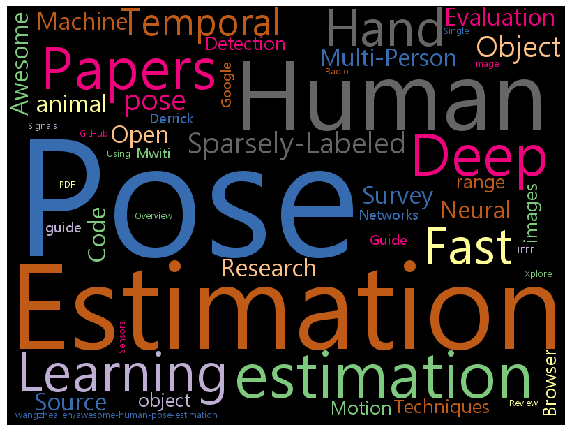

In [130]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=800,
                      height=600)

print(dict(words))

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()


### plot 메소드를 사용해 각 단어의 사용 빈도를 그래프로 그리기

In [143]:
from nltk import Text


text = Text(noun_list) 

type(text)

nltk.text.Text

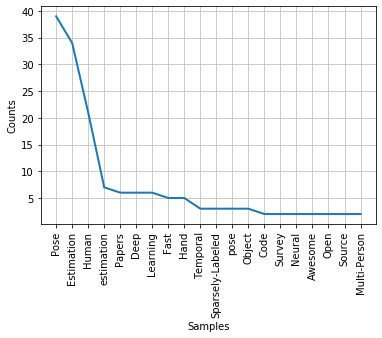

In [144]:
text.plot(20)

#### 단어가 사용된 위치를 시각화해서 단어 분포 확인하기

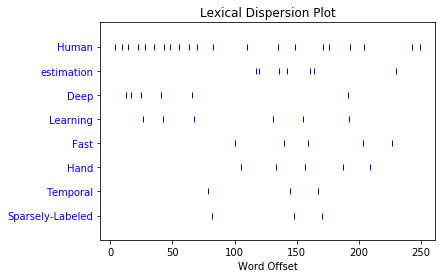

In [147]:
text.dispersion_plot(["Human", "estimation", "Deep", "Learning", "Fast", "Hand", "Temporal", "Sparsely-Labeled" ])